## CREACIÓ DE MODELOS 

### 1. OBTENCION DE LOS DATOS 

In [37]:
# importa librerias necesarias
import pandas as pd 
import numpy as np 


In [38]:
# cargar dataframe
df = pd.read_csv( 'promocionales.csv')
df.head()

,Unnamed: 0,FECHA,VERSION,DURACION,TIPO,HORA,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION,CIUDAD,CAMPAÑA,HORA_INICIO,HORA_FIN,RATING,TARGET
0,0,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:07,LARGOMETRAJE (M) (S-D),1.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,GUAYAQUIL,CONCURSO/ENTRETENIMIENTO,06:07:40,06:08:20,0.078215,18+
1,1,2023-01-01,AVANCE DIARIO,38.0,AUTOPROMOCION,06:08,LARGOMETRAJE (M) (S-D),1.0,126.666635,PROMOCION DEL CANAL,IMPACTOS 2022,LARGOMETRAJE,A,GUAYAQUIL,NOTICIERO,06:08:20,06:08:58,0.078215,18+
2,2,2023-01-01,AVANCE DIARIO,30.0,AUTOPROMOCION,06:23,LARGOMETRAJE (M) (S-D),2.0,100.000000,PROMOCION DEL CANAL,REPRISE MUNDIAL CATAR 2022,LARGOMETRAJE,A,GUAYAQUIL,DEPORTIVO,06:23:58,06:24:29,0.078215,18+
3,3,2023-01-01,AVANCE DIARIO IV,30.0,AUTOPROMOCION,06:24,LARGOMETRAJE (M) (S-D),2.0,100.000000,PROMOCION DEL CANAL,DIA A DIA (D),LARGOMETRAJE,A,GUAYAQUIL,REVISTA INFORMATIVA,06:24:29,06:24:59,0.078215,18+
4,4,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:41,LARGOMETRAJE (M) (S-D),3.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,GUAYAQUIL,CONCURSO/ENTRETENIMIENTO,06:41:36,06:42:16,0.078215,18+


In [46]:
# renombrar columnas 
df.rename( columns =  { 'CAMPAÑA': 'CAMPANIA', 'Rat.Prom.Prog': 'RATING' }, inplace = True)
df.tail()

,Unnamed: 0,FECHA,VERSION,DURACION,TIPO,HORA,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION,CIUDAD,CAMPANIA,HORA_INICIO,HORA_FIN,RATING,TARGET
843430,843430,2022-12-31,FIN DE CONTROL,12.0,CONTROL,00:07,LA GRAN AVENTURA DEL CINE II(S,1.0,266.6667,PROMOCION DEL CANAL,DIA A DIA (D),LARGOMETRAJE,LATE,QUITO,REVISTA INFORMATIVA,24:07:38,24:07:50,0.536113,Mujeres18+
843431,843431,2022-12-31,INICIO DE CONTROL,11.0,CONTROL,00:25,LA GRAN AVENTURA DEL CINE II(S,1.0,266.6667,PROMOCION DEL CANAL,DIA A DIA (D),LARGOMETRAJE,LATE,QUITO,REVISTA INFORMATIVA,24:25:09,24:25:20,0.536113,Mujeres18+
843432,843432,2022-12-31,FIN ESPACIO PUBLICITARIO,7.0,CONTROL,00:26,LA GRAN AVENTURA DEL CINE II(S,2.0,266.6667,PROMOCION DEL CANAL,TNV. CAFE CON AROMA DE MUJER,LARGOMETRAJE,LATE,QUITO,TELENOVELA,24:26:29,24:26:37,0.536113,Mujeres18+
843433,843433,2022-12-31,INICIO DE ESPACIO PUBLICITARIO,8.0,CONTROL,00:45,LA GRAN AVENTURA DEL CINE II(S,2.0,266.6667,PROMOCION DEL CANAL,EL AFTER,LARGOMETRAJE,LATE,QUITO,ESPECIALIZADO,24:45:02,24:45:11,0.536113,Mujeres18+
843434,843434,2022-12-31,FIN ESPACIO PUBLICITARIO-24 HORAS,6.0,CONTROL,00:46,LA GRAN AVENTURA DEL CINE II(S,3.0,266.6667,PROMOCION DEL CANAL,24 HORAS,LARGOMETRAJE,LATE,QUITO,NOTICIERO,24:46:20,24:46:27,0.536113,Mujeres18+


In [48]:
df.describe()

,Unnamed: 0,DURACION,BREAK,TARIFA,RATING
count,843435.000000,843435.000000,843435.000000,843435.000000,843435.000000
mean,421717.000000,21.989580,1.934930,535.259729,1.136646
std,243478.856483,13.982027,1.157944,380.799223,1.121150
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,210858.500000,8.000000,1.000000,283.333300,0.450164
50%,421717.000000,20.000000,2.000000,400.000000,0.835774
75%,632575.500000,30.000000,3.000000,733.333300,1.478501
max,843434.000000,425.000000,10.000000,7360.000000,26.164858


### 2. SEPARAR EN TRAIN Y TEST

In [49]:
# importar librerias necesarias 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


In [50]:
# separar datos en etiquetas y categorias 
X = df.drop("PROGRAMA", axis = 1)
y = df['PROGRAMA']


In [51]:
#PREPOSESAR CARACTERISTICAS
encoders = {}
for column in X.select_dtypes(include = ['object'] ).columns:
    encoder = LabelEncoder()
    X[column] = encoder.fit_transform( X[column] )
    encoders[column] = encoder
    


In [52]:
#separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 , random_state = 42 )

In [28]:
X_test

,Unnamed: 0,FECHA,VERSION,DURACION,TIPO,HORA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION,CIUDAD,CAMPANIA,HORA_INICIO,HORA_FIN,RATING,TARGET
746485,746485,162,86,6.0,1,1018,1.0,400.0000,5,218,8,1,1,1,31740,31715,2.470844,2
205484,205484,315,86,8.0,1,1028,1.0,466.6667,5,64,15,1,1,6,32292,32272,2.285246,0
761681,761681,162,123,8.0,2,405,3.0,400.0000,5,81,11,0,1,4,2097,2107,2.542977,3
455943,455943,57,123,29.0,2,531,3.0,400.0000,5,326,11,0,1,20,7315,7367,1.815893,0
303784,303784,350,41,40.0,0,32,1.0,1200.0000,5,28,14,3,1,19,54520,54588,0.255370,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549694,549694,91,52,20.0,0,767,4.0,333.3333,5,188,15,0,0,11,19352,19404,0.337478,2
206649,206649,325,8,20.0,0,709,4.0,200.0000,5,225,4,0,1,8,16266,16301,0.505829,0
127981,127981,267,82,20.0,0,768,4.0,333.3333,5,45,15,0,0,11,19394,19447,0.490718,4
290462,290462,340,86,5.0,1,923,1.0,266.6667,5,66,8,1,0,6,26303,26300,1.028849,1


### 3. ENTRENAR MODELO

In [54]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)


DecisionTreeClassifier()

In [30]:
y_pred = modelo.predict(X_test)


In [55]:
accuracy_score(y_test, y_pred)


0.9984112587217746

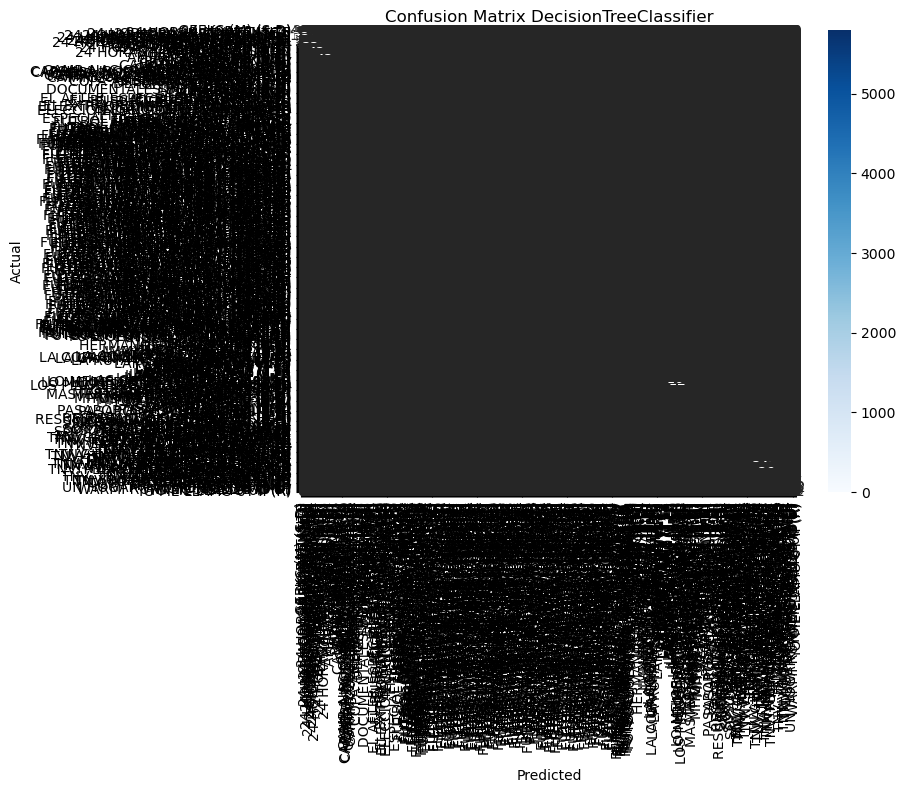

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

matriz = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))

sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix DecisionTreeClassifier")
plt.show()

In [56]:
import pickle 

modelName  = "dtrm_model.pkl"
encodersName = "dtrm_encoder.pkl"

pickle.dump( modelo,  open(modelName, 'wb')) 
pickle.dump(encoders,  open(encodersName, 'wb')) 


In [57]:
import pickle 
modelName  = "dtrm_model.pkl"
encodersName = "dtrm_encoder.pkl"
dtrm_l =  pickle.load( open(modelName, 'rb' ))
dtrm_e = pickle.load( open(encodersName, 'rb'))


In [58]:
ndata = df.iloc[843427:843428]
ndata = ndata.drop(['PROGRAMA'], axis = 1 )
ndata


,Unnamed: 0,FECHA,VERSION,DURACION,TIPO,HORA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION,CIUDAD,CAMPANIA,HORA_INICIO,HORA_FIN,RATING,TARGET
843427,843427,2022-12-31,FIN ESPACIO PUBLICITARIO-24 HORAS,6.0,CONTROL,23:33,1.0,466.6667,PROMOCION DEL CANAL,24 HORAS,HUMORISTICO,LATE,QUITO,NOTICIERO,23:33:52,23:33:59,0.756596,Mujeres18+


In [44]:
for column in ndata.columns: 
    if column in dtrm_e:
        enco = dtrm_e[column]
        ndata[column] = enco.transform(ndata[column])
        
ndata        

,Unnamed: 0,FECHA,VERSION,DURACION,TIPO,HORA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION,CIUDAD,CAMPAÑA,HORA_INICIO,HORA_FIN,RATING,TARGET
843427,843427,213,140,6.0,2,1413,1.0,466.6667,5,2,HUMORISTICO,3,1,NOTICIERO,51476,51498,0.756596,4


In [ ]:
pdd = dtrm_l.predict(ndata)
pdd